Cellpose version: 4.0.1 (major number: 4)


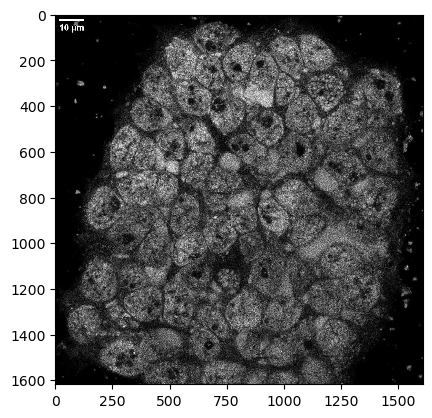

In [ ]:
import napari
import glob
from skimage.io import imread
from pathlib import Path
from matplotlib import pyplot as plt
import napari
import cellpose
from tnia.plotting.plt_helper import random_label_cmap, mask_overlay
#from tnia.plotting.plt_helper import imshow2d
import os

parent_path = r"D:\images\tnia-python-images\imagesc\2025_05_17_dense_nuclei"
im_name = r"Screen Shot 2025-05-16 at 5.25.59 PM.jpg"
image = imread(os.path.join(parent_path, im_name))

from cellpose import models, io

plt.imshow(image)

major_number = cellpose.version.split('.')[0]
print(f"Cellpose version: {cellpose.version} (major number: {major_number})")

if major_number == '3':
    model = models.Cellpose(gpu=True, model_type='cyto2')
elif major_number == '4':
    model = models.CellposeModel(gpu=True)


In [4]:
from skimage.io import imsave

#result = model.eval(image, cellprob_threshold = -2, flow_threshold=1.0, niter=2000, diameter=60)
result = model.eval(image, niter=2000)
result_name = 'result_defaults_'+ cellpose.version + '.tif'
imsave(result_name, result[0])

try:
    print('diameter mean', model.diam_mean)
except:
    print("Call to model.diam_mean failed in version " + cellpose.version)



Call to model.diam_mean failed in version 4.0.1


c:\Users\bnort\miniconda3\envs\microsam_cellose_sam\Lib\site-packages\skimage\_shared\utils.py:328: UserWarning: result_defaults_4.0.1.tif is a low contrast image
  return func(*args, **kwargs)


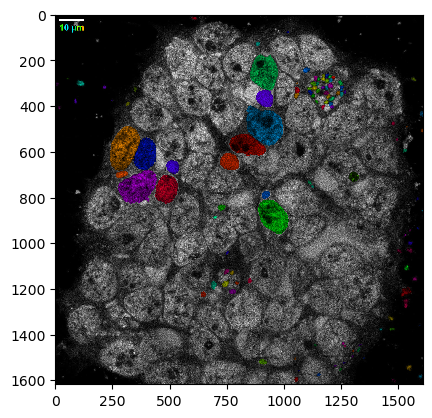

In [5]:
test = mask_overlay(image, result[0])
plt.imshow(test)#, cmap=random_label_cmap())

In [16]:
import napari

viewer = napari.Viewer()

viewer.add_image(image, name='image')
viewer.add_labels(result[0], name='labels')
viewer.add_labels(label, name='neurips label')

<Labels layer 'neurips label' at 0x21353838110>